**Designing the Perfect Olympian with Python** </br>

Every four years, millions of sports fans from around the world gather to watch their favorite athletes compete in the Olympic Games. We are amazed at the achievements of these athletes and on occasion, we are able to witness true , once in a generation, greatness. Michael Phelps, Larisa Latynina, and Jesse Owens are just a few of the many legends that have been made at the Olympics. </br>

Is it possible, though, to create the perfect Olympian - independent of sport? What would they look like? Where would they be from? Below we will take a look at raw data of listing every Olympian since the founding of the Modern Games in 1896. We will take a look at what makes an Olympian great, and, if it is possible to create the "perfect Olympian."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
Image(url = 'https://goo.gl/F3dV3c', width=350, height=350)

Our data comes from Kaggle.com's Featured Dataset on Olympians, which we will read as a CSV below using the Pandas Data Analysis Library.

In [3]:
filepath = '/Users/mal/Downloads/athlete_events.csv'

In [4]:
df = pd.read_csv(filepath)

After reading our CSV into a Pandas Dataframe, we are able to see the columns that make up our data. The columns are:
    
**ID:**      Athlete Identification Number <br/>
**Name:**    Name of the Athlete <br/>
**Sex:**     Gender of the Athlete <br/>
**Age:**     Age in Years <br/>
**Height:**  Height in Centimeters <br/>
**Weight:**  Weight in Kilograms <br/>
**Team:**    Country of the Athlete <br/>
**NOC:**     Nationality or Country <br/>
**Games:**   Which Olympics the Event Took Place In <br/>
**Year:**    Year of the Olympic Games in which the Athlete Competed <br/>
**Season:**  Winter or Summer Olympics <br/>
**City:**    City in which the Olympic Games took Place <br/>
**Sport:**   Sport that the Athlete Competed in for this Event <br/>
**Event:**   Specific Event that the Athlete Competed In <br/>
**Medal:**   Resulting Medal of the Athlete in the listed Event (if any) <br/>

As you can see below, our data is a bit messy and hard to follow. First, we must remove excess and/or repetitive data to give us a more clear picture of what it is exactly that we are looking at and if our data tells us anything that is noteworthy.

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df.index = df['ID']

In [7]:
del df['ID']
del df['Team']
del df['Games']
del df['City']

We have now removed excess columns that repeat infomation and/or provide unneccessary information to give ourselves a cleaner look at the dataframe at hand. The first 5 rows of this new dataframe are below.</br>

Unfortunately it appears that some of our athletes from early Olympic Games do not have a listed Height and Weight. As a result, we must remove their data as they will not be able to tell us very much about the makeup of our ideal Olympian.</br>

Additionally, we must remove information about competitors in events that did not receive medals as we only want an Olympian that wins medals and acheives greatness.

In [8]:
df.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
ID,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
df = df.dropna()

We now have a clean dataset, the first 5 lines of which are shown below, with columns including the ID number, name, sex, age, height, weight, nationality, year, season, sport, event, and medal of each athlete in each event we will be looking at to create our ultimate olympian.

In [10]:
df.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
ID,,,,,,,,,,,
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Horse Vault,Gold
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


Now that our dataframe is clean, let's visualize some of our data to get a general understanding of the information with which we are working. This visualization component will allow us to further understand and interpret our data as we continue to work with the data at hand.

In [11]:
def age_plot_function(df):
    y = df.value_counts(sort=False)
    avg = df.mean()
    plt.axvline(x=avg, color='red')
    plt.plot(y)
    plt.title('Ages of Olympians')
    plt.ylabel('Frequency of Occurence')
    plt.xlabel('Age (in Years)')
    plt.show()

Below, we are able to see the age distribution of Olympians. The distribution is skewed right with a mean of 25.43 years as marked by the red vertical line on the graph. The minimum age of any competitor is 13 years, while the maximum age of any competitor is 66 years. 

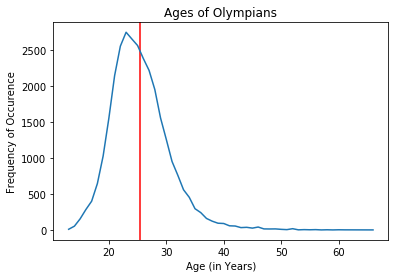

In [12]:
age_plot_function(df['Age'])

In [13]:
def height_plot_function(df):
    y = df.value_counts(sort=False)
    avg = df.mean()
    plt.axvline(x=avg, color='red')
    plt.plot(y)
    plt.title('Heights of Olympians')
    plt.ylabel('Frequency of Occurence')
    plt.xlabel('Height (in Centimeters)')
    plt.show()

Furthermore, height appears to be normally distributed centering around the mean of 177.64 centimeters. This is substantially higher than the worldwide average human height of 168 cm.

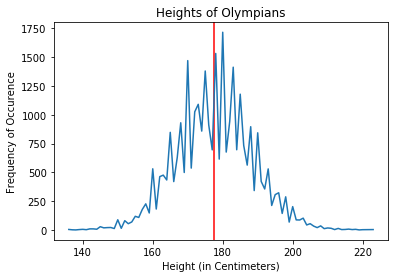

In [14]:
height_plot_function(df['Height'])

In [15]:
def weight_plot_function(df):
    y = df.value_counts(sort=False)
    avg = df.mean()
    plt.axvline(x=avg, color='red')
    plt.plot(y)
    plt.title('Weight of Olympians')
    plt.ylabel('Frequency of Occurence')
    plt.xlabel('Weight (in Kilograms)')
    plt.show()

Below is a graph that doesn't really make sense, so I need to fix it lol

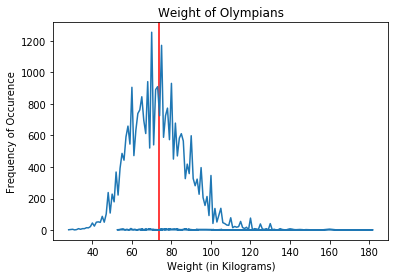

In [16]:
weight_plot_function(df['Weight'])

Now that we have a general understanding of the data regarding the physical nature of our Olympians, we will assign values to events resulting in a Gold, Silver, and Bronze medal in order to weight athlete's who achieve more successful results more heavily than those who achieve lesser results. </br>

A "Gold" event will be worth 5 points as gold medals contribute the most to the legacy of a great Olympian. </br>

A "Silver" event will be worth 3 points, as silver medals contribute less to the legacy of an Olympian as compared to Gold. </br>

Finally, a "Bronze" event will be worth 1 point as it contributes substantially less than gold medals to the legacy of great Olympians and lesser still than silver medals.

In [17]:
df['medal_value'] = pd.np.where(df.Medal.str.contains('Gold'), 5,
                    pd.np.where(df.Medal.str.contains('Silver'), 3,
                    pd.np.where(df.Medal.str.contains('Bronze'), 1, 'medal_value')))

In [18]:
df.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,medal_value
ID,,,,,,,,,,,,
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold,5
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Horse Vault,Gold,5
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,5


Now that we are rewarding our best atheletes for their successes, we must sort our dataframe into Male and Female Olympians as the Olympics are, in reality, divided into events based on gender.

In [19]:
df_male = df[df.Sex == 'M']
df_female = df[df.Sex == 'F']

In [20]:
df_male.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,medal_value
ID,,,,,,,,,,,,
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold,5
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Horse Vault,Gold,5
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,5


In [21]:
df_female.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,medal_value
ID,,,,,,,,,,,,
37,Ann Kristin Aarnes,F,23.0,182.0,64.0,NOR,1996,Summer,Football,Football Women's Football,Bronze,1
65,Patimat Abakarova,F,21.0,165.0,49.0,AZE,2016,Summer,Taekwondo,Taekwondo Women's Flyweight,Bronze,1
67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,RUS,2008,Summer,Athletics,Athletics Women's Javelin Throw,Silver,3
90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,RUS,2004,Summer,Cycling,Cycling Women's Sprint,Silver,3
153,Monica Cecilia Abbott,F,23.0,191.0,88.0,USA,2008,Summer,Softball,Softball Women's Softball,Silver,3


Now that we have our dataframes in male and female groupings, it is time to look at the physical attributes that contribute to the success of Olympic athletes in our data. </br>

What is the ideal age of a Male Athlete in the Olympics? A female athlete? What will their height be? Their Weight? </br>

In order to find out, we must use our medal values to weigh the outcomes and thus the athletes in each event. This will tell us the age, height, and weight with which we will most likely be able to achieve Olympic glory.

In [22]:
def ideal_age(df):
    ideal_age = sum((df.Age.astype(float) * df.medal_value.astype(float))) / sum(df.medal_value.astype(float))
    return ideal_age.round(2)

In [23]:
def ideal_height(df):
    ideal_height = sum((df.Height.astype(float) * df.medal_value.astype(float))) / sum(df.medal_value.astype(float))
    return ideal_height.round(2)

In [24]:
def ideal_weight(df):
    ideal_weight = sum((df.Weight.astype(float) * df.medal_value.astype(float))) / sum(df.medal_value.astype(float))
    return ideal_weight.round(2)

In [25]:
print('Ideal Male Olympian Age:', ideal_age(df_male), 'years old')
print('Ideal Male Olympian Height:', ideal_height(df_male), 'cm')
print('Ideal Male Olympian Weight:', ideal_weight(df_male), 'kg', '\n')
print('Ideal Female Olympian Age:', ideal_age(df_female), 'years old')
print('Ideal Female Olympian Height:', ideal_height(df_female), 'cm')
print('Ideal Female Olympian Weight:', ideal_weight(df_female), 'kg')

Ideal Male Olympian Age: 25.85 years old
Ideal Male Olympian Height: 181.5 cm
Ideal Male Olympian Weight: 79.4 kg 

Ideal Female Olympian Age: 24.51 years old
Ideal Female Olympian Height: 170.63 cm
Ideal Female Olympian Weight: 63.32 kg


As we can see above, our perfect **Male Olympian is about 26 years old, 182 centimeters tall, and 79 kilograms.** Our perfect **Female Olympian is 25 years old, 171 centimeters, and 63 kilograms.** These ages, heights, and weights will make our athlete competitive in a variety of sports and thus will give them the greatest chance of winning, were they to enter every event possible.

Are physical attributes alone enough to create a world renowned Olympic athlete, however? In order to test this, we must look at the countries our athletes come from to determine other factors in play beyond physical makeup.

In [26]:
winningest_countries = pd.value_counts(df.NOC.ravel())

In [27]:
winningest_countries.head()

USA    4383
URS    2246
GER    1612
AUS    1206
RUS    1134
dtype: int64

As we can see, there are clearly countries that dominate the Olympic Games. For example, it is far easier to win an Olympic medal as an athlete from a developed country. The United States and Russia lead the way with 4,383 medals and 3,380 medals (USSR: 2246 + Russia: 1134) respectively. </br>

As a result, our athlete must grow up in the 1st world in a develope or increasingly developing country if we want them to have the best chance of success in the Olympic Games. Now that we know where to raise our athlete and what size they should be, what should we name this athlete?

In [28]:
def naming_our_athlete(df):
    ideal_name = sum(df['Name'].str.len() * df.medal_value.astype(float)) / sum(df.medal_value.astype(float))
    return ideal_name.round(2)

In [29]:
print("Our Male Athlete's name should be", naming_our_athlete(df_male), "characters long")
print("Our Female Athlete's name should be", naming_our_athlete(df_female), "characters long")

Our Male Athlete's name should be 19.78 characters long
Our Female Athlete's name should be 23.46 characters long


As we can see, the best male athletes have names with roughly 20 characters and the best femal athletes have names with roughly 23 characters. As a result, we will call our male athlete Marcus Leon Williams who will hail from the United States and our female athlete Nastia Maria Luchenova who will hail from Russia. </br>

**Final Results:** </br>

    Ideal Male Olympian:
    
    Mr. Marcus Leon Williams
        Age: 26 years old
        Height: 182 centimeters
        Weight: 79 kilograms
        Nationality: USA
    
    Ideal Female Olympian:
    
    Miss Nastia Maria Luchenova
        Age: 25 years old
        Height: 171 centimeters
        Weight: 63 kilograms
        Nationality: Russia
    
Now that we have created our superior athletes, Mr. Marcus Leon Williams and Miss Nastia Maria Luchenova, it is time to put them to the test. See you in Tokyo in 2020!